# Coursera Capstone Project 

&nbsp;
# 1. Problem

  ### 1.1 Introduction

![Mumbai City](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Victoria_Terminus%2C_Mumbai.jpg/650px-Victoria_Terminus%2C_Mumbai.jpg "Mumbai City")

Mumbai (formerly known as Bombay) is one of the top metro cities of India with rich heritage and culture. Indian Institute of Technology Bombay (IIT Bombay) situated in Mumbai, is a public engineering institution known for best education facilities in India. 


  ### 1.2 Problem Statement
&nbsp;

![IIT Bombay](http://www.iitb.ac.in/sites/default/files/styles/gallery_item/public/IITB%20First%20Convocation.jpg "IIT Bombay")



Lots of students stay away from their homes during their 4 year tenure of study at IIT Bombay. Being a student at IIT Bombay, I would like to reside in the neighbourhood of the institution. I will explore the venues of each neighbourhood of the institution and look for the neighbourhoods having ample hostels, malls, restaurants, departmental stores, book stores and tranportation etc. The best neighbourhood according to my preference would be my first choice for stay during my entire study term at IIT Bombay. :D This analysis may help students who wish to reside nearby IIT Bombay Campus. 


# 2. (Data) IIT Bombay Neighbourhoods Data
&nbsp;

I downloaded the required data from a website published by government of india. Here is a link to the website... https://data.gov.in/resources/all-india-pincode-directory-contact-details-along-latitude-and-longitude.

This csv file, contains the list of pincodes of all cities of India, officenames (post office), the head office (HO) names of each officename etc. The Latitude and Longitude columns are incomplete for most areas. So, I will try to fill it with the help of Geopy. I am using Foursquare API to get the venues of each neighbourhood of the institution.

As I need only the details of 'Mumbai' city and 'Chembur' area in Mumbai of which IIT Bombay Campus is a sub-area, I filtered the dataframe accordingly.


I have converted the csv file to pandas dataframe and displayed the  head of dataframe below. Further data formatting steps are given below. Thank you!



In [1]:
import pandas as pd
india_data = pd.read_csv('C:\\Users\\sree2\\Downloads\\india.csv',header=0)
india_data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


### Formatting and cleaning data
1. We need the data pertaining to Districtname= 'Mumbai', so I will filter only the rows having Districtname= "Mumbai".
2. Since IIT Bombay's Related HeadOffice is "Chembur" , we will keep the part of dataframe having Related HeadOffice= "Chembur".
3. Next we will, keep the columns officename, pincode, longitude, latitude
4. We check for multiple occurences of each pincode 
5. We rename the column 'officename' as 'neighborhood' and combine the neighborhoods having same pincode with a ','

In [2]:
# 1.
mumbai_data=india_data[india_data.Districtname.str.contains("Mumbai") == True]
mumbai_data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
81395,Antop Hill S.O,400037,S.O,Delivery,Mumbai East,Mumbai,Maharashtra,Mumbai,Mumbai,MAHARASHTRA,022-24120290,NaN,Dadar H.O,NaN,NaN
81396,B P T Colony S.O,400037,S.O,Non-Delivery,Mumbai East,Mumbai,Maharashtra,Mumbai,Mumbai,MAHARASHTRA,022-4100525,NaN,Dadar H.O,NaN,NaN
81397,B.P.Lane S.O,400003,S.O,Non-Delivery,Mumbai East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-23421653,NaN,Chinchbunder H.O,NaN,NaN
81398,BEST STaff Quarters S.O,400012,S.O,Non-Delivery,Mumbai East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-24180776,NaN,Chinchbunder H.O,NaN,NaN
81399,C G S Colony S.O,400037,S.O,Non-Delivery,Mumbai East,Mumbai,Maharashtra,Mumbai,Mumbai,MAHARASHTRA,022-24097933,NaN,Dadar H.O,NaN,NaN


In [3]:
# 2.
mumbai_data= mumbai_data.rename(columns = {"Related Headoffice": "relatedHeadoffice"}) 
iit_data=mumbai_data[mumbai_data.relatedHeadoffice.str.contains("Chembur")== True]
iit_data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,relatedHeadoffice,longitude,latitude
81471,Anushakti Nagar S.O,400094,S.O,Delivery,Mumbai North East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-25517841,NaN,Chembur H.O,NaN,NaN
81472,BARC S.O,400085,S.O,Delivery,Mumbai North East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-25505213,NaN,Chembur H.O,NaN,NaN
81473,Barve Nagar S.O,400084,S.O,Delivery,Mumbai North East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-25129862,NaN,Chembur H.O,NaN,NaN
81474,Best Staff Colony S.O,400075,S.O,Non-Delivery,Mumbai North East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-25024536,NaN,Chembur H.O,NaN,NaN
81475,Bhandup Complex S.O,400082,S.O,Delivery,Mumbai North East,Mumbai,Maharashtra,NaN,Mumbai,MAHARASHTRA,022-25962436,NaN,Chembur H.O,NaN,NaN


In [4]:
# 3.
iit_data=iit_data[['officename','pincode','longitude','latitude']].reset_index()
iit_data=iit_data.drop(['index'], axis = 1)
iit_data.head()

,officename,pincode,longitude,latitude
0,Anushakti Nagar S.O,400094,NaN,NaN
1,BARC S.O,400085,NaN,NaN
2,Barve Nagar S.O,400084,NaN,NaN
3,Best Staff Colony S.O,400075,NaN,NaN
4,Bhandup Complex S.O,400082,NaN,NaN


In [5]:
# 4.
iit_data['pincode'].value_counts()

400078    5
400080    5
400074    3
400075    3
400088    3
400086    3
400043    2
400081    2
400079    2
400082    2
400083    2
400089    2
400042    1
400084    1
400085    1
400087    1
400077    1
400076    1
400094    1
400071    1
Name: pincode, dtype: int64

In [6]:
# 5.
iit_data= iit_data.groupby(['pincode'])['officename'].apply(', '.join).reset_index()
iit_data= iit_data.rename(columns = {"officename": "neighborhood"}) 
iit_data

,pincode,neighborhood
0,400042,Bhandup East S.O
1,400043,"D.M. Colony S.O, Shivaji Nagar S.O (Mumbai)"
2,400071,Sindhi Society S.O
3,400074,"Chembur Extension S.O, FCI S.O, Mahul Road S.O"
4,400075,"Best Staff Colony S.O, Pant Nagar S.O, R.A.Nag..."
5,400076,Powai Iit S.O
6,400077,Rajawadi S.O
7,400078,"Bhandup Ind. Estate S.O, Bhandup West S.O, J.M..."
8,400079,"Psm Colony S.O, Vikhroli S.O"
9,400080,"Mulund Dd Road S.O, Mulund West S.O, Nahur S.O..."


# 3. Geopy for finding Latitudes and Longitudes

In [7]:
# importing some stuff!!!!
import requests 

import numpy as np 
import random 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim


from IPython.display import Image 
from IPython.core.display import HTML 
    

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base conda




Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.




==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base conda




In [8]:
#converting pincode to str type
iit_data=iit_data.astype({"pincode": str})
iit_data.dtypes

pincode         object
neighborhood    object
dtype: object

In [9]:
#adding columns latitude, longitude and address
iit_data["latitude"]=""
iit_data["longitude"]=""
iit_data['address']=""
iit_data.head()


,pincode,neighborhood,latitude,longitude,address
0,400042,Bhandup East S.O,,,
1,400043,"D.M. Colony S.O, Shivaji Nagar S.O (Mumbai)",,,
2,400071,Sindhi Society S.O,,,
3,400074,"Chembur Extension S.O, FCI S.O, Mahul Road S.O",,,
4,400075,"Best Staff Colony S.O, Pant Nagar S.O, R.A.Nag...",,,


In [10]:
#getting latitude longitude and address
!pip install pgeocode
import pgeocode
country_code = 'in'
for index, row in iit_data.iterrows():
    
    pin_code=row['pincode']
    nomi = pgeocode.Nominatim(country_code)
    place_details = nomi.query_postal_code(pin_code)
    row['latitude']=place_details.latitude
    row['longitude']=place_details.longitude
    row['address']=place_details.place_name

iit_data.head()

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


,pincode,neighborhood,latitude,longitude,address
0,400042,Bhandup East S.O,19.0832,72.8748,Bhandup East
1,400043,"D.M. Colony S.O, Shivaji Nagar S.O (Mumbai)",18.9596,72.8875,"Shivaji Nagar (Mumbai), D.M. Colony"
2,400071,Sindhi Society S.O,19.0931,72.9049,"Sindhi Society, Chembur H.O"
3,400074,"Chembur Extension S.O, FCI S.O, Mahul Road S.O",19.0931,72.9049,"FCI, Chembur Extension, Mahul Road"
4,400075,"Best Staff Colony S.O, Pant Nagar S.O, R.A.Nag...",19.0931,72.9049,"R.A.Nagar, Best Staff Colony, Pant Nagar"


In [11]:
#removing neighbourhood column (address' are too generalized) and renaming adress column to neighbourhood
iit_data=iit_data.drop(['neighborhood'], axis = 1)
iit_data=iit_data.rename(columns = {"address": "neighborhood"})
iit_data.head()

,pincode,latitude,longitude,neighborhood
0,400042,19.0832,72.8748,Bhandup East
1,400043,18.9596,72.8875,"Shivaji Nagar (Mumbai), D.M. Colony"
2,400071,19.0931,72.9049,"Sindhi Society, Chembur H.O"
3,400074,19.0931,72.9049,"FCI, Chembur Extension, Mahul Road"
4,400075,19.0931,72.9049,"R.A.Nagar, Best Staff Colony, Pant Nagar"


In [12]:
#moving neighborhood column to front of the dataframe
data = iit_data['neighborhood']
iit_data.drop(labels=['neighborhood'], axis=1,inplace = True)
iit_data.insert(0, 'neighborhood', data)
iit_data

,neighborhood,pincode,latitude,longitude
0,Bhandup East,400042,19.0832,72.8748
1,"Shivaji Nagar (Mumbai), D.M. Colony",400043,18.9596,72.8875
2,"Sindhi Society, Chembur H.O",400071,19.0931,72.9049
3,"FCI, Chembur Extension, Mahul Road",400074,19.0931,72.9049
4,"R.A.Nagar, Best Staff Colony, Pant Nagar",400075,19.0931,72.9049
5,Powai Iit,400076,19.0931,72.9049
6,Rajawadi,400077,18.9596,72.8496
7,"J.M. Road, Usha Nagar, Bhandup Ind. Estate, P....",400078,19.0931,72.9049
8,"Vikhroli, Psm Colony",400079,18.9596,72.8881
9,"Mulund Dd Road, Nahur, Mulund West, S.B. Road,...",400080,19.176,72.9317


In [13]:
#map of Mumbai neighborhoods!!
address = 'Mumbai'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_iit = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, label in zip(iit_data['latitude'], iit_data['longitude'], iit_data['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_iit)  
    
map_iit

# 4. Foursquare API to get Venues

In [14]:
#credentials!!
CLIENT_ID = 'OB1EDINQLYDSPTH5KCDKXYU2TNPRYEOFHWNIOBCZI10GCVDH' # Foursquare ID
CLIENT_SECRET = 'ZF0HNFOHBFATCDIS512XEBZTF4HXGSWMMHMLPKI31BXY35X2' # Foursquare Secret
VERSION = '20200117'

In [15]:
#function to get nearby venues of each neighbourhood of iit Bombay
LIMIT=100
radius=500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#running the above function
iit_venues = getNearbyVenues(names=iit_data['neighborhood'],
                                 latitudes=iit_data['latitude'],
                                 longitudes=iit_data['longitude'])


Bhandup East
Shivaji Nagar (Mumbai), D.M. Colony
Sindhi Society, Chembur H.O
FCI, Chembur Extension, Mahul Road
R.A.Nagar, Best Staff Colony, Pant Nagar
Powai Iit
Rajawadi
J.M. Road, Usha Nagar, Bhandup Ind. Estate, P.H. Colony, Bhandup West
Vikhroli, Psm Colony
Mulund Dd Road, Nahur, Mulund West, S.B. Road, Nehru Road (Mumbai)
Mhada Colony, Mulund East
Bhandup Complex, Mulund Colony
Kannamwar Nagar, Tagore Nagar
Barve Nagar
BARC
Ghatkopar West, Rifle Range, Sahakar Bhavan
NITIE
T.F.Donar, Trombay, Govandi
Tilak Nagar (Mumbai), Chembur Rs
Anushakti Nagar


In [17]:
iit_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bhandup East,19.0832,72.8748,Lufthansa Lounge (Star Alliance),19.083919,72.875361,Airport Lounge
1,Bhandup East,19.0832,72.8748,Body Shop,19.082779,72.871439,Cosmetics Shop
2,Bhandup East,19.0832,72.8748,Mahesh Stores,19.080775,72.871885,Grocery Store
3,Bhandup East,19.0832,72.8748,Head Quarters,19.085998,72.871951,Beer Garden
4,"Sindhi Society, Chembur H.O",19.0931,72.9049,vagadwala bus stop,19.092878,72.901088,Bus Station


In [18]:
#one hot encoding
iit_onehot = pd.get_dummies(iit_venues[['Venue Category']], prefix="", prefix_sep="")
iit_onehot.head()

,Airport Lounge,Beer Garden,Bus Station,Clothing Store,Cosmetics Shop,Dessert Shop,Grocery Store,Movie Theater,Music Venue,Playground
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [19]:
iit_onehot['Neighborhood'] = iit_venues['Neighborhood'] 
# moving neighborhood column to the first column
fixed_columns = [iit_onehot.columns[-1]] + list(iit_onehot.columns[:-1])
iit_onehot = iit_onehot[fixed_columns]
iit_onehot.head()

,Neighborhood,Airport Lounge,Beer Garden,Bus Station,Clothing Store,Cosmetics Shop,Dessert Shop,Grocery Store,Movie Theater,Music Venue,Playground
0,Bhandup East,1,0,0,0,0,0,0,0,0,0
1,Bhandup East,0,0,0,0,1,0,0,0,0,0
2,Bhandup East,0,0,0,0,0,0,1,0,0,0
3,Bhandup East,0,1,0,0,0,0,0,0,0,0
4,"Sindhi Society, Chembur H.O",0,0,1,0,0,0,0,0,0,0


In [36]:
iit_grouped = iit_onehot.groupby('Neighborhood').mean().reset_index()
iit_grouped.head()

,Neighborhood,Airport Lounge,Beer Garden,Bus Station,Clothing Store,Cosmetics Shop,Dessert Shop,Grocery Store,Movie Theater,Music Venue,Playground
0,BARC,0.00,0.00,0.0,0.5,0.00,0.0,0.00,0.5,0.0,0.0
1,Barve Nagar,0.00,0.00,0.0,0.5,0.00,0.0,0.00,0.5,0.0,0.0
2,"Bhandup Complex, Mulund Colony",0.00,0.00,0.0,0.5,0.00,0.0,0.00,0.5,0.0,0.0
3,Bhandup East,0.25,0.25,0.0,0.0,0.25,0.0,0.25,0.0,0.0,0.0
4,"FCI, Chembur Extension, Mahul Road",0.00,0.00,0.5,0.0,0.00,0.0,0.00,0.0,0.0,0.5


In [37]:
#getting top 5 venues for each neighborhood
num_top_venues = 5

for hood in iit_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = iit_grouped[iit_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BARC----
            venue  freq
0  Clothing Store   0.5
1   Movie Theater   0.5
2  Airport Lounge   0.0
3     Beer Garden   0.0
4     Bus Station   0.0


----Barve Nagar----
            venue  freq
0  Clothing Store   0.5
1   Movie Theater   0.5
2  Airport Lounge   0.0
3     Beer Garden   0.0
4     Bus Station   0.0


----Bhandup Complex, Mulund Colony----
            venue  freq
0  Clothing Store   0.5
1   Movie Theater   0.5
2  Airport Lounge   0.0
3     Beer Garden   0.0
4     Bus Station   0.0


----Bhandup East----
            venue  freq
0  Airport Lounge  0.25
1     Beer Garden  0.25
2  Cosmetics Shop  0.25
3   Grocery Store  0.25
4     Bus Station  0.00


----FCI, Chembur Extension, Mahul Road----
            venue  freq
0     Bus Station   0.5
1      Playground   0.5
2  Airport Lounge   0.0
3     Beer Garden   0.0
4  Clothing Store   0.0


----Ghatkopar West, Rifle Range, Sahakar Bhavan----
            venue  freq
0  Clothing Store   0.5
1   Movie Theater   0.5
2  Airport

In [38]:
#function to return sorted venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
# getting top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = iit_grouped['Neighborhood']

for ind in np.arange(iit_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(iit_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARC,Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
1,Barve Nagar,Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
2,"Bhandup Complex, Mulund Colony",Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
3,Bhandup East,Grocery Store,Cosmetics Shop,Beer Garden,Airport Lounge,Playground,Music Venue,Movie Theater,Dessert Shop,Clothing Store,Bus Station
4,"FCI, Chembur Extension, Mahul Road",Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge


# 5. Clustering and Visualizing Neighborhoods

In [40]:
#finding optimal 'k' with silhouette method :D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iit_grouped_clustering=iit_grouped.drop(['Neighborhood'],axis=1)
sil = []

K= range(2,11)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(iit_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(iit_grouped_clustering, labels, metric = 'euclidean'))


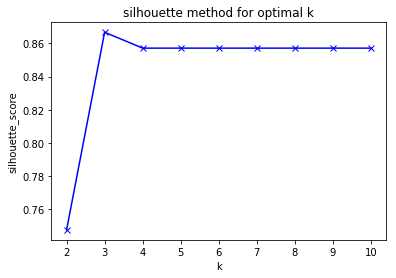

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt

# according to plot k=3 is the most optimal!!
plt.plot(K,sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette method for optimal k')
plt.show()

In [42]:
# setting number of clusters
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(iit_grouped_clustering)
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 1, 0, 1, 0, 2, 0])

In [43]:
iit_data= iit_data.rename(columns = {"neighborhood": "Neighborhood"}) 
iit_data.head()

,Neighborhood,pincode,latitude,longitude
0,Bhandup East,400042,19.0832,72.8748
1,"Shivaji Nagar (Mumbai), D.M. Colony",400043,18.9596,72.8875
2,"Sindhi Society, Chembur H.O",400071,19.0931,72.9049
3,"FCI, Chembur Extension, Mahul Road",400074,19.0931,72.9049
4,"R.A.Nagar, Best Staff Colony, Pant Nagar",400075,19.0931,72.9049


In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
iit_merged = iit_data
iit_merged = iit_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
iit_merged.head()


,Neighborhood,pincode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bhandup East,400042,19.0832,72.8748,2.0,Grocery Store,Cosmetics Shop,Beer Garden,Airport Lounge,Playground,Music Venue,Movie Theater,Dessert Shop,Clothing Store,Bus Station
1,"Shivaji Nagar (Mumbai), D.M. Colony",400043,18.9596,72.8875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sindhi Society, Chembur H.O",400071,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
3,"FCI, Chembur Extension, Mahul Road",400074,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
4,"R.A.Nagar, Best Staff Colony, Pant Nagar",400075,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge


In [47]:
iit_merged= iit_merged.rename(columns = {"Cluster Labels": "ClusterLabels"})
iit_merged.head()

,Neighborhood,pincode,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bhandup East,400042,19.0832,72.8748,2.0,Grocery Store,Cosmetics Shop,Beer Garden,Airport Lounge,Playground,Music Venue,Movie Theater,Dessert Shop,Clothing Store,Bus Station
1,"Shivaji Nagar (Mumbai), D.M. Colony",400043,18.9596,72.8875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sindhi Society, Chembur H.O",400071,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
3,"FCI, Chembur Extension, Mahul Road",400074,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
4,"R.A.Nagar, Best Staff Colony, Pant Nagar",400075,19.0931,72.9049,1.0,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge


In [52]:
#removing Nan!!
iit_merged = iit_merged[np.isfinite(iit_merged['ClusterLabels'])].reset_index()
iit_merged=iit_merged.drop(['index'],axis=1)

In [59]:
iit_merged['ClusterLabels'] = iit_merged['ClusterLabels'].astype(int)


In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(iit_merged['latitude'], iit_merged['longitude'], iit_merged['Neighborhood'], iit_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

In [66]:
## cluster 0!! only displaying heads!! 
iit_merged.loc[iit_merged['ClusterLabels'] == 0, iit_merged.columns[[0] + list(range(5, iit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Bhandup Complex, Mulund Colony",Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
8,"Kannamwar Nagar, Tagore Nagar",Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
9,Barve Nagar,Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
10,BARC,Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge
11,"Ghatkopar West, Rifle Range, Sahakar Bhavan",Movie Theater,Clothing Store,Playground,Music Venue,Grocery Store,Dessert Shop,Cosmetics Shop,Bus Station,Beer Garden,Airport Lounge


In [68]:
## cluster 1!! only displaying heads!! 
iit_merged.loc[iit_merged['ClusterLabels'] == 1, iit_merged.columns[[0] + list(range(5, iit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Sindhi Society, Chembur H.O",Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
2,"FCI, Chembur Extension, Mahul Road",Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
3,"R.A.Nagar, Best Staff Colony, Pant Nagar",Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
4,Powai Iit,Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge
5,"J.M. Road, Usha Nagar, Bhandup Ind. Estate, P....",Playground,Bus Station,Music Venue,Movie Theater,Grocery Store,Dessert Shop,Cosmetics Shop,Clothing Store,Beer Garden,Airport Lounge


In [69]:
## cluster 2!! only displaying heads!! 
iit_merged.loc[iit_merged['ClusterLabels'] == 2, iit_merged.columns[[0] + list(range(5, iit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bhandup East,Grocery Store,Cosmetics Shop,Beer Garden,Airport Lounge,Playground,Music Venue,Movie Theater,Dessert Shop,Clothing Store,Bus Station
6,"Mulund Dd Road, Nahur, Mulund West, S.B. Road,...",Music Venue,Dessert Shop,Playground,Movie Theater,Grocery Store,Cosmetics Shop,Clothing Store,Bus Station,Beer Garden,Airport Lounge


# 6. Suggestion
After examining, the areas in Clusters 0, we see that they are more common in terms of Movie Theatres and Departmental Stores, whereas cluster 1 areas are more popular for Bus stations i.e transport. So any student who prefers Departmental stores proximity, could stay in the Neighborhoods of cluster 0 or if they prefer quick transportation they can choose Neighborhoods of cluster 1. Thank you!!! :D